In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving medical_students_dataset.csv to medical_students_dataset (1).csv


# Medical Students Dataset

1. Data Exploration and Understanding:

In [4]:
# Load the dataset
file_name = next(iter(uploaded))
data = pd.read_csv('medical_students_dataset.csv')

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         886 non-null    int64  
 1   age        886 non-null    int64  
 2   year       886 non-null    int64  
 3   sex        886 non-null    int64  
 4   glang      886 non-null    int64  
 5   part       886 non-null    int64  
 6   job        886 non-null    int64  
 7   stud_h     886 non-null    int64  
 8   health     886 non-null    int64  
 9   psyt       886 non-null    int64  
 10  jspe       886 non-null    int64  
 11  qcae_cog   886 non-null    int64  
 12  qcae_aff   886 non-null    int64  
 13  amsp       886 non-null    int64  
 14  erec_mean  886 non-null    float64
 15  cesd       886 non-null    int64  
 16  stai_t     886 non-null    int64  
 17  mbi_ex     886 non-null    int64  
 18  mbi_cy     886 non-null    int64  
 19  mbi_ea     886 non-null    in

In [6]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                id         age        year         sex       glang  \
count   886.000000  886.000000  886.000000  886.000000  886.000000   
mean    889.709932   22.383747    3.102709    1.695260   14.327314   
std     515.555875    3.300664    1.763937    0.472665   32.366389   
min       2.000000   17.000000    1.000000    1.000000    1.000000   
25%     447.500000   20.000000    1.000000    1.000000    1.000000   
50%     876.000000   22.000000    3.000000    2.000000    1.000000   
75%    1341.750000   24.000000    5.000000    2.000000    1.000000   
max    1790.000000   49.000000    6.000000    3.000000  121.000000   

             part         job      stud_h      health        psyt        jspe  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.563205    0.348758   25.288939    3.777652    0.224605  106.374718   
std      0.496269    0.476847   15.927875    1.061497    0.417558    8.784012   
min      0.000000    0.0

In [7]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64


In [8]:
# Display unique values in categorical columns
categorical_columns = ['age','year','sex','health']  # Add other categorical columns as needed
for column in categorical_columns:
    print(f"\nUnique values in {column}:")
    print(data[column].unique())


Unique values in age:
[18 26 21 23 22 24 27 19 20 25 29 32 37 31 28 30 35 17 33 49 44 34 39 38]

Unique values in year:
[1 4 3 2 5 6]

Unique values in sex:
[1 2 3]

Unique values in health:
[3 4 5 2 1]


In [9]:
# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  


2. Data Preprocessing:

In [10]:
# Handling Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Data Cleaning (Example: Removing outliers in 'age')
# Assuming age above 40 is an outlier, you can decide on your threshold
data = data[data['age'] <= 40]

# Feature Engineering (Example: Creating a new feature 'age_category')
data['age_category'] = pd.cut(data['age'], bins=[0, 20, 30, 40], labels=['<20', '20-30', '30-40'])

# Encoding Categorical Variables (Example: One-Hot Encoding for 'sex' column)
encoder = OneHotEncoder(drop='first', sparse=False)
sex_encoded = encoder.fit_transform(data[['sex']])
data.drop('sex', axis=1, inplace=True)  # Dropping the original 'sex' column

# Display first few rows after preprocessing
print("\nFirst 5 rows of the dataset after preprocessing:")
print(data.head())

Missing Values:
id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

First 5 rows of the dataset after preprocessing:
   id  age  year  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    120     1    0      56       3     0    88        62   
1   4   26     4      1     1    0      20       4     0   109        55   
2   9   21     3      1     0    0      36       3     0   106        64   
3  10   21     2      1     0    1      51       5     0   101        52   
4  13   21     3      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  \
0        27    17   0.738095    34      61      17      13      20   
1        37    22   0.69

<ipython-input-10-a15ebee686cb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_category'] = pd.cut(data['age'], bins=[0, 20, 30, 40], labels=['<20', '20-30', '30-40'])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<ipython-input-11-c8659c477e11>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


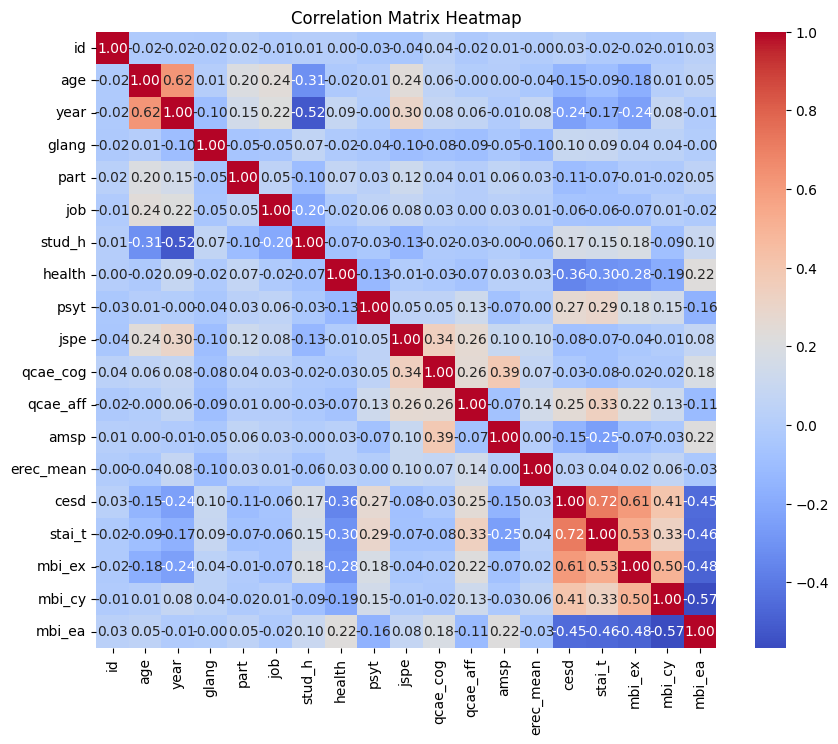

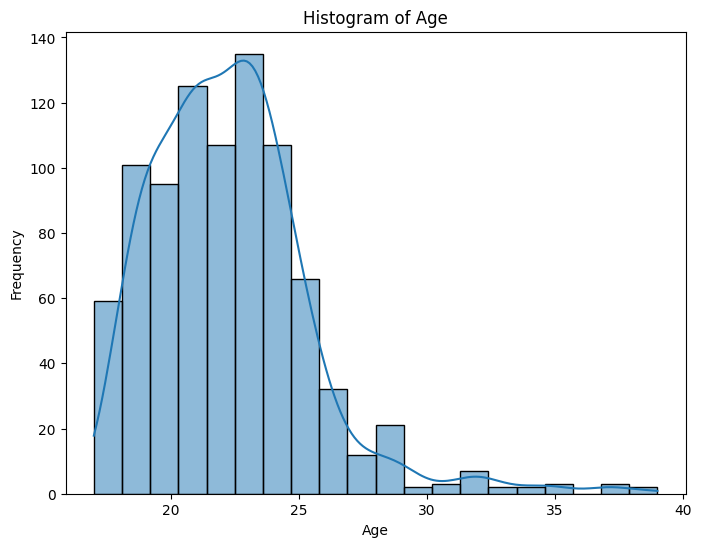

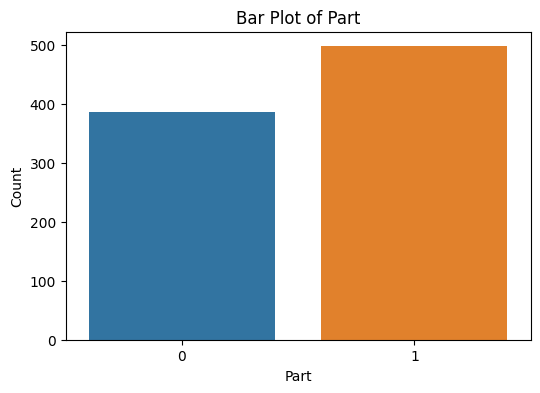

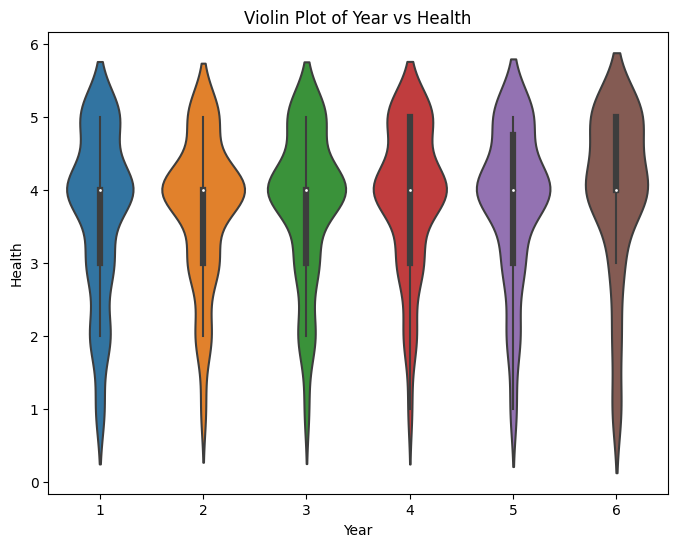

In [11]:
# Perform Exploratory Data Analysis (EDA)
# Let's start by exploring the relationships between numerical variables using a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Visualization - Examples
# Example 1: Histogram of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example 2: Bar plot of 'part'
plt.figure(figsize=(6, 4))
sns.countplot(x='part', data=data)
plt.title('Bar Plot of Part')
plt.xlabel('Part')
plt.ylabel('Count')
plt.show()

# Example 3: Violin plot of 'year' vs 'health'
plt.figure(figsize=(8, 6))
sns.violinplot(x='year', y='health', data=data)
plt.title('Violin Plot of Year vs Health')
plt.xlabel('Year')
plt.ylabel('Health')
plt.show()

3. Data Analysis and Visualization:

<ipython-input-12-144219ade6c4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


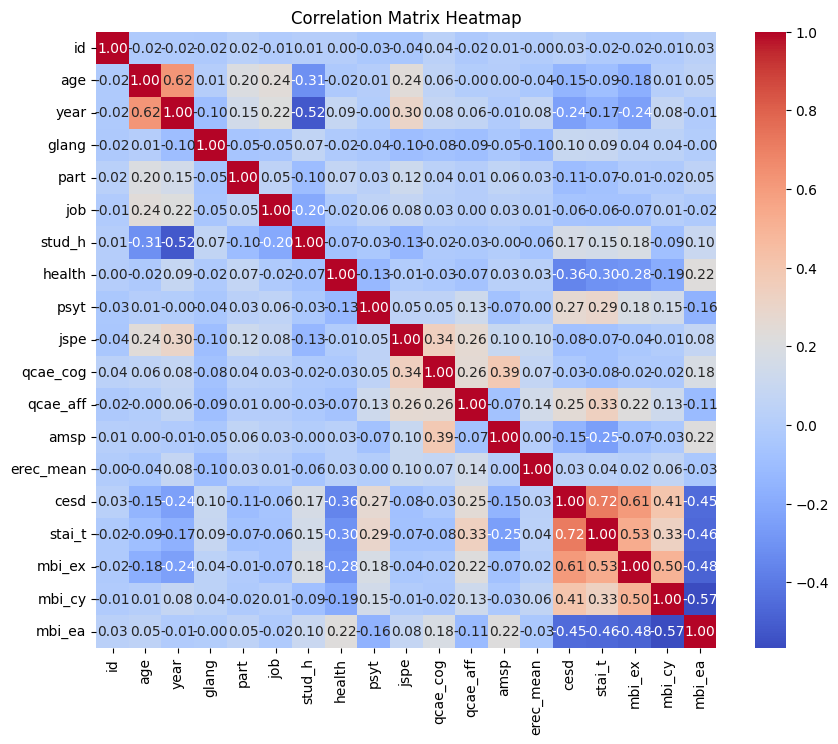

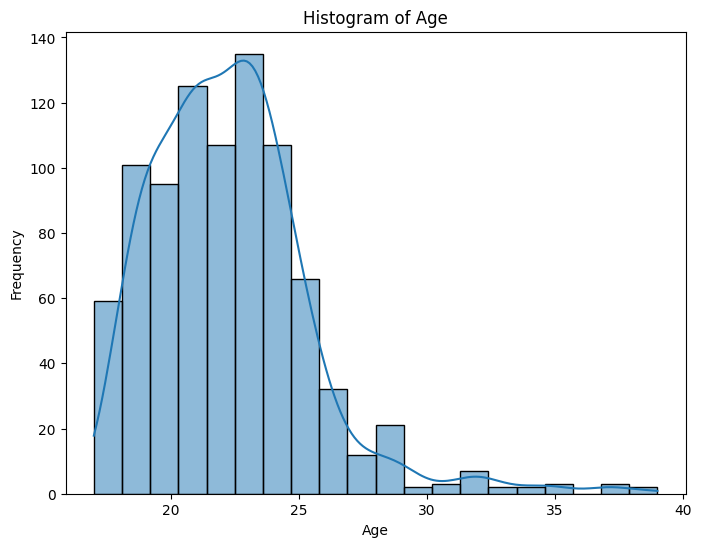

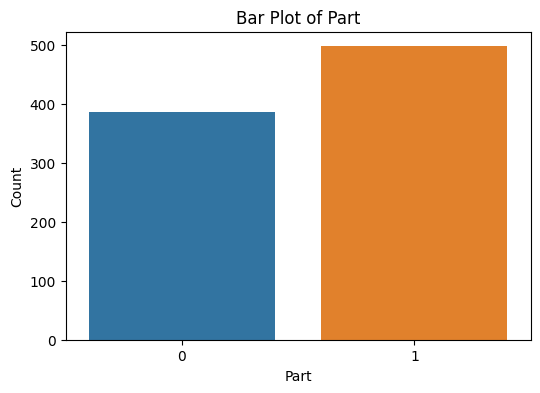

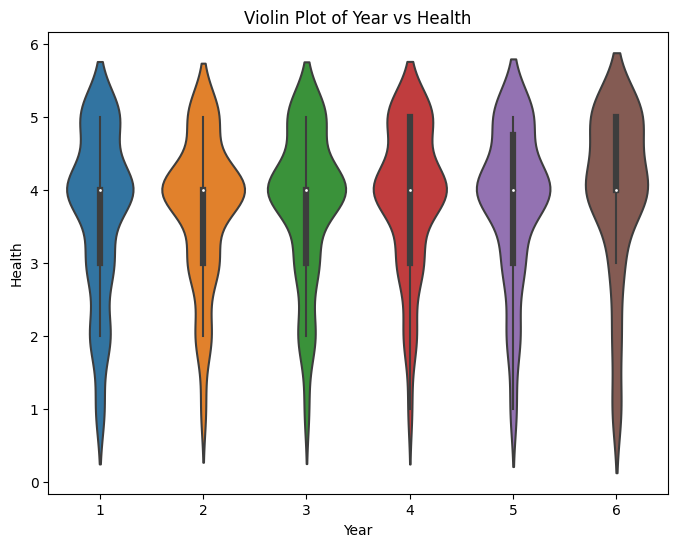

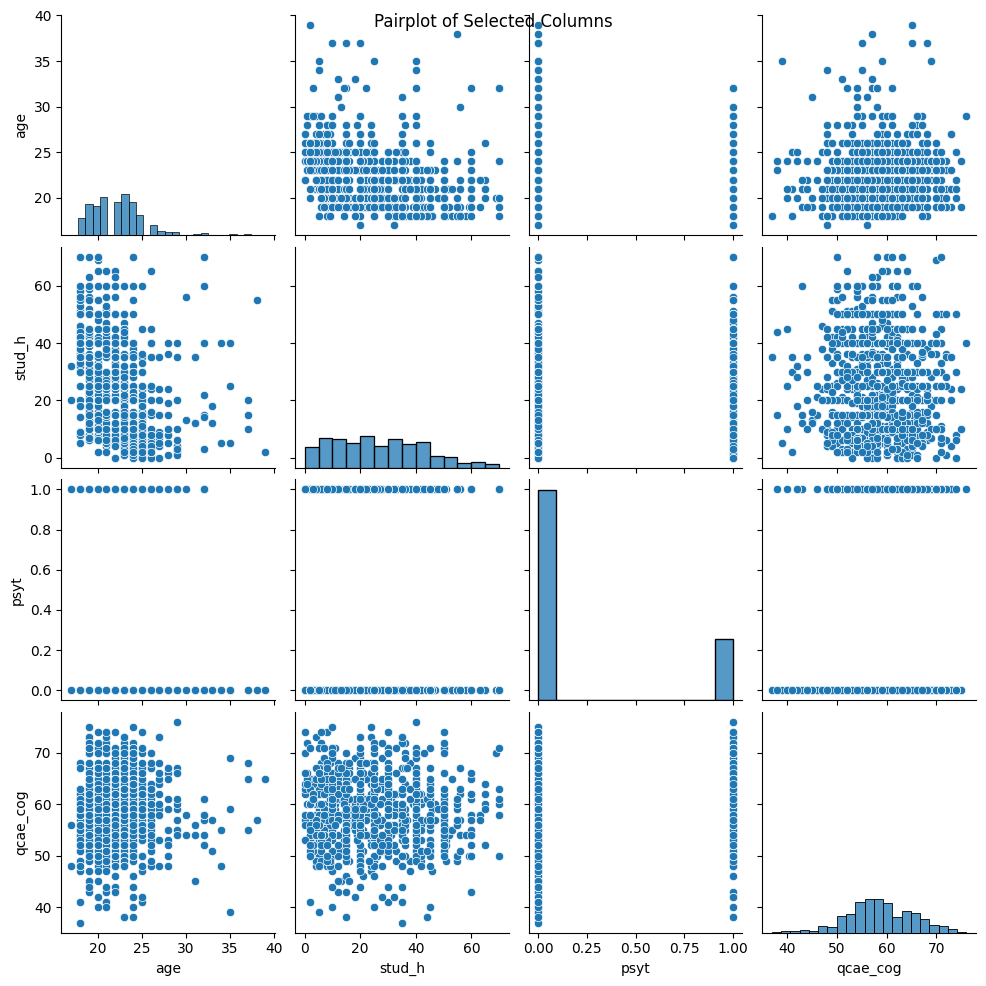

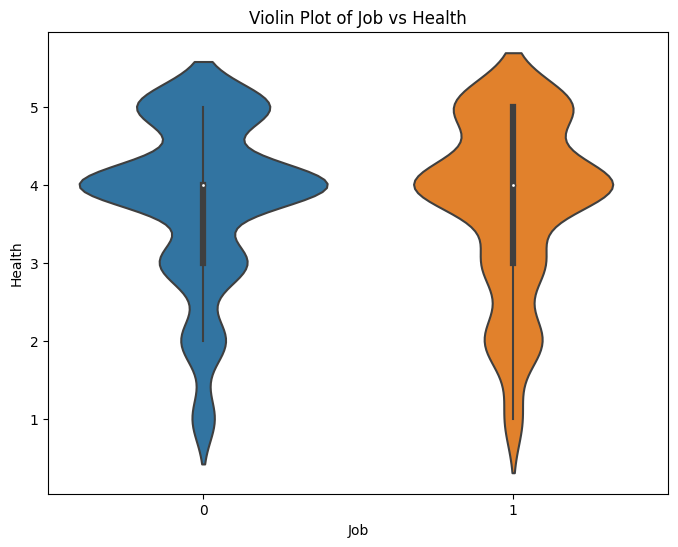

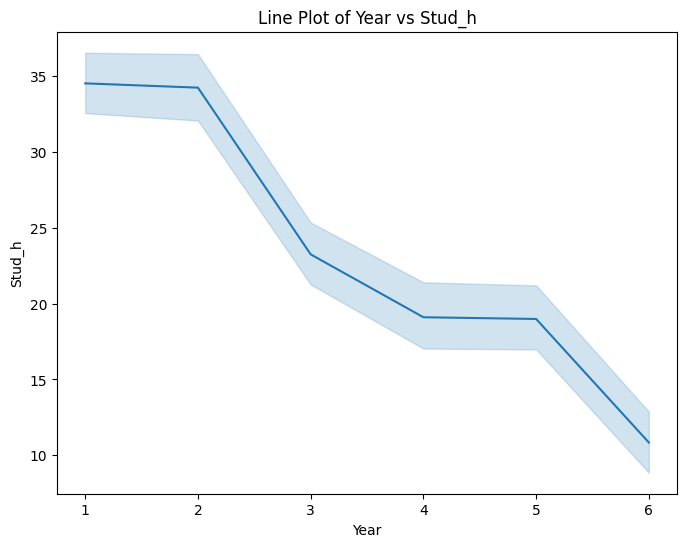

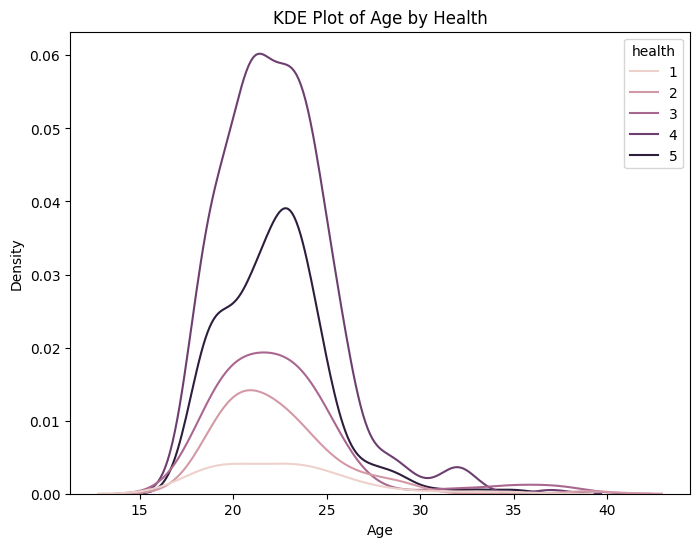

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


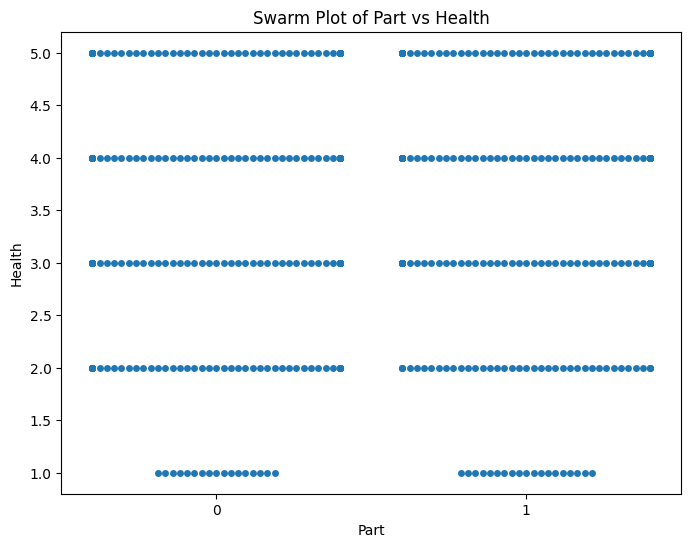

<ipython-input-12-144219ade6c4>:74: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mbi_ex'], bins=20, kde=True)


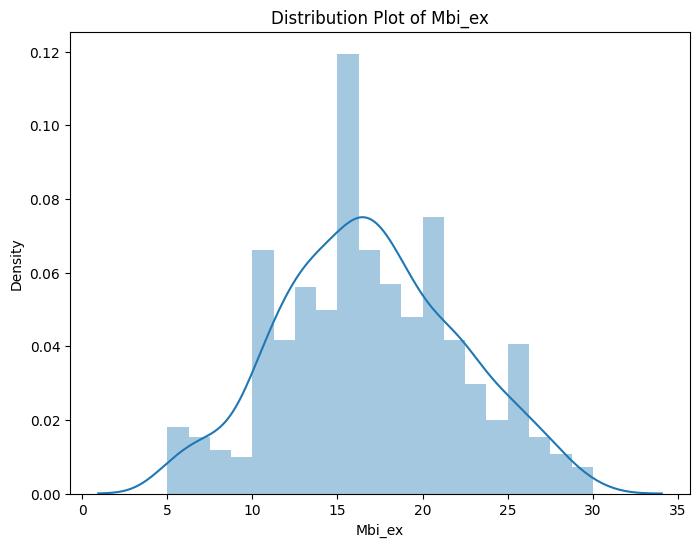

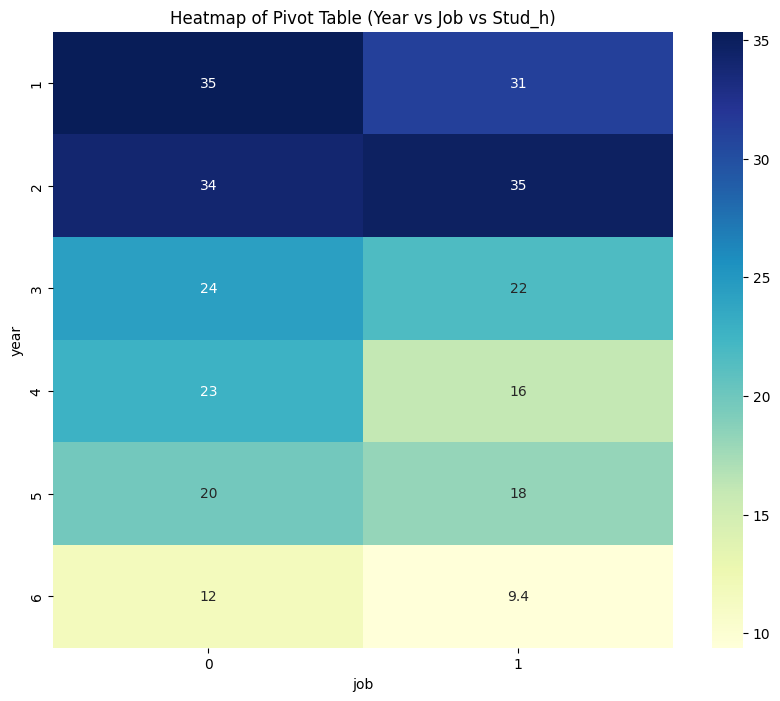

In [12]:
# Perform Exploratory Data Analysis (EDA)
# Let's start by exploring the relationships between numerical variables using a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Visualization - Examples
# Example 1: Histogram of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example 2: Bar plot of 'part'
plt.figure(figsize=(6, 4))
sns.countplot(x='part', data=data)
plt.title('Bar Plot of Part')
plt.xlabel('Part')
plt.ylabel('Count')
plt.show()

# Example 3: Violin plot of 'year' vs 'health'
plt.figure(figsize=(8, 6))
sns.violinplot(x='year', y='health', data=data)
plt.title('Violin Plot of Year vs Health')
plt.xlabel('Year')
plt.ylabel('Health')
plt.show()

# Example 4: Pairplot of selected columns
columns_for_pairplot = ['age', 'stud_h', 'psyt', 'qcae_cog']
sns.pairplot(data[columns_for_pairplot])
plt.suptitle('Pairplot of Selected Columns')
plt.show()

# Example 5: Violin plot of 'job' vs 'health'
plt.figure(figsize=(8, 6))
sns.violinplot(x='job', y='health', data=data)
plt.title('Violin Plot of Job vs Health')
plt.xlabel('Job')
plt.ylabel('Health')
plt.show()

# Example 6: Line plot of 'year' vs 'stud_h'
plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='stud_h', data=data)
plt.title('Line Plot of Year vs Stud_h')
plt.xlabel('Year')
plt.ylabel('Stud_h')
plt.show()

# Example 7: KDE plot of 'age' by 'health'
plt.figure(figsize=(8, 6))
sns.kdeplot(x='age', hue='health', data=data)
plt.title('KDE Plot of Age by Health')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Example 8: Swarm plot of 'part' vs 'health'
plt.figure(figsize=(8, 6))
sns.swarmplot(x='part', y='health', data=data)
plt.title('Swarm Plot of Part vs Health')
plt.xlabel('Part')
plt.ylabel('Health')
plt.show()

# Example 9: Distribution plot of 'mbi_ex'
plt.figure(figsize=(8, 6))
sns.distplot(data['mbi_ex'], bins=20, kde=True)
plt.title('Distribution Plot of Mbi_ex')
plt.xlabel('Mbi_ex')
plt.ylabel('Density')
plt.show()

# Example 10: Heatmap of pivot table
pivot_table = data.pivot_table(index='year', columns='job', values='stud_h', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Pivot Table (Year vs Job vs Stud_h)')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
target_variable = 'psyt'
features = ['age', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'jspe',
            'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']

X = data[features]  # Features
y = data[target_variable]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predictions
linear_reg_pred = linear_reg.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Evaluate models
def evaluate_model(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    rmse = mean_squared_error(true_values, predictions, squared=False)
    r2 = r2_score(true_values, predictions)
    return mse, rmse, r2

print("Linear Regression Metrics:")
linear_reg_metrics = evaluate_model(linear_reg_pred, y_test)
print(f"MSE: {linear_reg_metrics[0]}, RMSE: {linear_reg_metrics[1]}, R-squared: {linear_reg_metrics[2]}")

print("\nRandom Forest Metrics:")
random_forest_metrics = evaluate_model(random_forest_pred, y_test)
print(f"MSE: {random_forest_metrics[0]}, RMSE: {random_forest_metrics[1]}, R-squared: {random_forest_metrics[2]}")

Linear Regression Metrics:
MSE: 6.812876638902121e-31, RMSE: 8.254015167724204e-16, R-squared: 1.0

Random Forest Metrics:
MSE: 0.0, RMSE: 0.0, R-squared: 1.0
